# Exploring the possibilities of yfinance

**This page is divided in X parts. The goal is to test the functionalities of yfinance**

In [3]:
import subprocess
import sys

# Install a library
package = "yfinance"
subprocess.check_call([sys.executable, "-m", "pip", "install", package])

0

## I. Understanding the module

### I.1. Price

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download data at 2-minute intervals
Apple_price = yf.download("AAPL", period="1d", interval="1m")

# Check the first few lines of data
print(Apple_price.head())

[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2025-01-08 14:30:00+00:00  241.684998  242.000000  241.509995  241.970001   
2025-01-08 14:31:00+00:00  241.475006  241.809906  241.199997  241.729996   
2025-01-08 14:32:00+00:00  241.145004  241.570007  241.119995  241.514999   
2025-01-08 14:33:00+00:00  240.822495  241.354996  240.809998  241.145004   
2025-01-08 14:34:00+00:00  241.250000  241.330002  240.767807  240.839996   

Price                       Volume  
Ticker                        AAPL  
Datetime                            
2025-01-08 14:30:00+00:00  1063675  
2025-01-08 14:31:00+00:00   181316  
2025-01-08 14:32:00+00:00   136322  
2025-01-08 14:33:00+00:00   209325  
2025-01-08 14:34:00+00:00   130409  


In [6]:
print(Apple_price.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


We can see the columns linked to the ticker :
- Close: Last price traded during the period (Trend analysis and financial calculations)
- High: Maximum price reached during the period (Identify resistances and volatility)
- Low: Minimum price reached during the period (Identify support and volatility)
- Open: First price traded during the period (Observe initial trends or gaps)
- Volume: Total number of trades during the period (Assess interest and liquidity)

Here are the time intervals available : [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

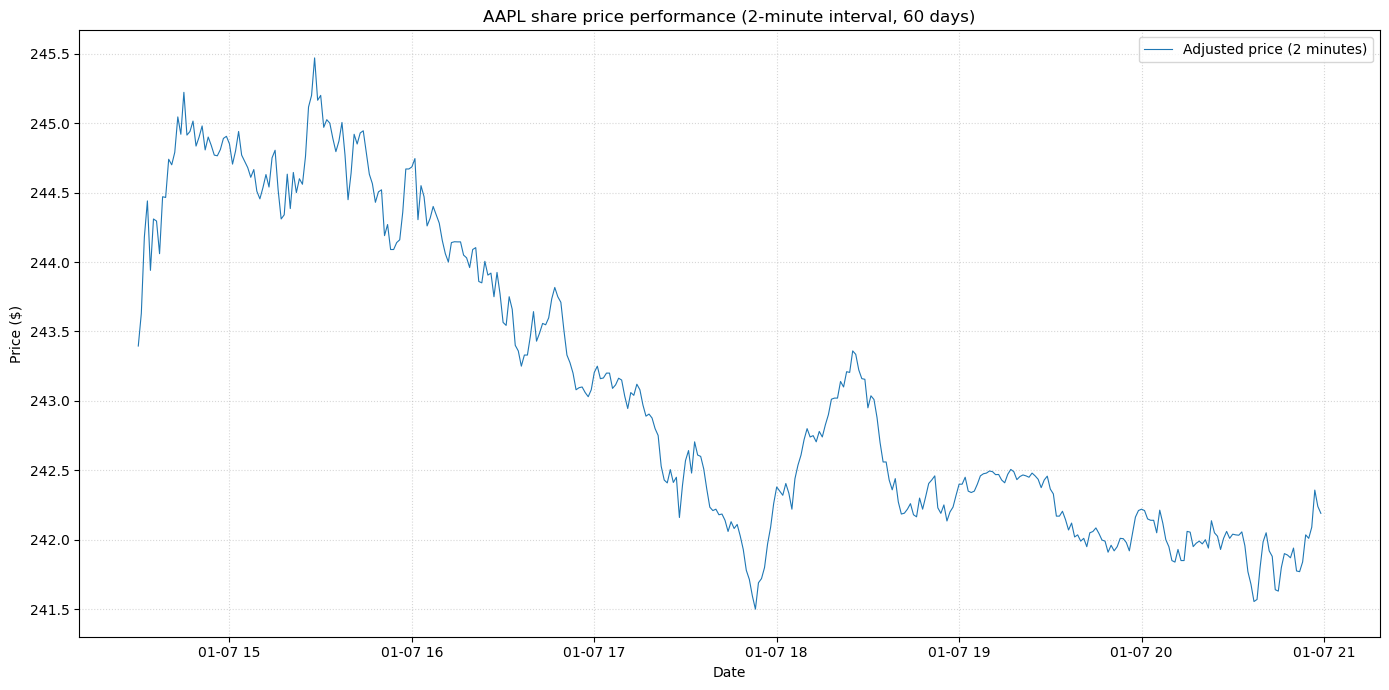

In [ ]:
# Track adjusted prices (Close)
plt.figure(figsize=(14, 7))
plt.plot(Apple_price.index, Apple_price['Close'], label="Adjusted price (2 minutes)", linewidth=0.8)
plt.title("AAPL share price performance (2-minute interval, 60 days)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

### I.2. General info

In [10]:
# Create a Ticker object
Apple_info = yf.Ticker("AAPL")

# Explore the keys available in the info attribute
print("Available keys :", Apple_info.info.keys())
# List of keys to recover
keys = ["beta"]

# Retrieve and display information
for key in keys:
    value = Apple_info.info.get(key, "Non disponible")
    print(f"{key}: {value}")

Available keys : dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividen

These are general information on the ticker.
Here are some that could interest us in the future :

**1. Market price data**: `previous close
- `previous close` : Last closing price.
- `regularMarketOpen` : Market opening price.
- `regularMarketDayLow` : Lowest price of the day.
- `regularMarketDayHigh` : High of the day.
- `fiftyTwoWeekLow` : 52 week low.
- `fiftyTwoWeekHigh` : 52 week high.
- `fiftyDayAverage` : 50-day moving average (useful for strategies).
- `twoHundredDayAverage` : 200-day moving average.

**2. Financial data**
- `beta` : Measure of volatility relative to the market, useful for analysing systematic risk.
- `trailingPE` : Historical price/earnings ratio.
- `forwardPE` : Forward price/earnings ratio.
- `enterpriseValue` : Enterprise value.
- `priceToBook` : Price to book ratio.
- `priceToSalesTrailing12Months` : Price/revenue ratio.
- `profitMargins` : Profit margins.
- `returnOnAssets` : Return on assets.
- `returnOnEquity` : Return on equity.

**3. Volume and liquidity**
- `volume` : Current volume.
- `regularMarketVolume` : Regular market volume.
- `averageVolume` : Average volume over a longer period (important for liquidity).
- `averageVolume10days` : Average volume over 10 days.

**4. Dividend calculation**
- `dividendRate` : Annual dividend rate.
- `dividendYield` : Dividend yield.
- `trailingAnnualDividendRate` : Historical annual dividend.
- `TrailingAnnualDividendYield` : Historical dividend yield.
- `exDividendDate` : Ex-dividend date (useful for anticipating payments).

**5. Recommendations and future**
- `targetHighPrice` : Highest target price.
- `targetLowPrice` : Lowest target price.
- `targetMeanPrice` : Average target price.
- `recommendationMean` : Average recommendation.
- `recommendationKey` : Summary of recommendations.
- `numberOfAnalystOpinions` : Number of analyst opinions available.

**6. General data**:
- `sector` : Business sector (useful for diversifying the portfolio).

## II. Derivatives

**Retrieve option dates**

In [5]:
Apple = yf.Ticker("AAPL")
print(Apple.options)

('2025-01-10', '2025-01-17', '2025-01-24', '2025-01-31', '2025-02-07', '2025-02-14', '2025-02-21', '2025-03-21', '2025-04-17', '2025-06-20', '2025-07-18', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15')


**Being able to retrieve information on the prices of the options chosen**

In [21]:
print(Apple.option_chain("2025-01-10").calls.head())
print(Apple.option_chain("2025-01-10").puts.head())

        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  AAPL250110C00105000 2024-12-27 16:41:06+00:00   105.0     149.60  136.70   
1  AAPL250110C00110000 2024-11-29 17:01:29+00:00   110.0     127.73    0.00   
2  AAPL250110C00115000 2025-01-02 17:37:35+00:00   115.0     127.90  126.70   
3  AAPL250110C00120000 2024-12-27 16:29:00+00:00   120.0     134.65  121.75   
4  AAPL250110C00125000 2024-12-27 17:03:06+00:00   125.0     128.65  117.45   

      ask  change  percentChange  volume  openInterest  impliedVolatility  \
0  139.00     0.0            0.0     1.0             8           4.718754   
1    0.00     0.0            0.0     2.0             2           0.000010   
2  129.00     0.0            0.0     1.0             6           4.242192   
3  124.45     0.0            0.0     1.0            26           4.589848   
4  119.00     0.0            0.0     1.0            15           4.539067   

   inTheMoney contractSize currency  
0        True      REGUL